In [0]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
y1=iris.target
x1= iris.data

In [0]:
df = pd.DataFrame(x1,
                  columns = iris.feature_names)

In [278]:
df['species']=y1
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


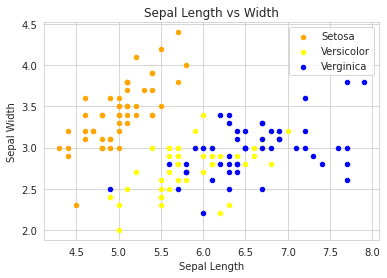

In [279]:
fig = df[df['species'] == 0].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='orange', label='Setosa')
df[df['species'] == 1].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='yellow', label='Versicolor', ax=fig)
df[df['species'] == 2].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', color='blue', label='Verginica', ax=fig)
fig.set_ylabel('Sepal Width')
fig.set_xlabel('Sepal Length')
fig.set_title('Sepal Length vs Width')

fig = plt.gcf()
plt.show()

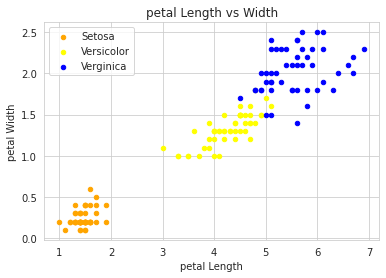

In [280]:
fig = df[df['species'] == 0].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='orange', label='Setosa')
df[df['species'] == 1].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='yellow', label='Versicolor', ax=fig)
df[df['species'] == 2].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', color='blue', label='Verginica', ax=fig)
fig.set_ylabel('petal Width')
fig.set_xlabel('petal Length')
fig.set_title('petal Length vs Width')

fig = plt.gcf()
plt.show()

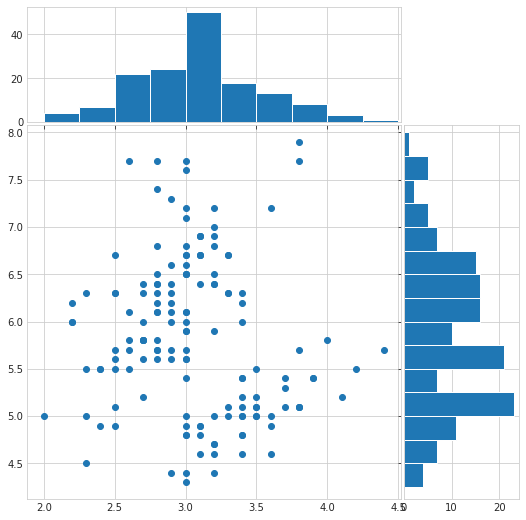

In [281]:
x = df['sepal width (cm)']
y = df['sepal length (cm)']
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

#rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x,y,)
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()
#reference taken from sikit learn to plot this graph

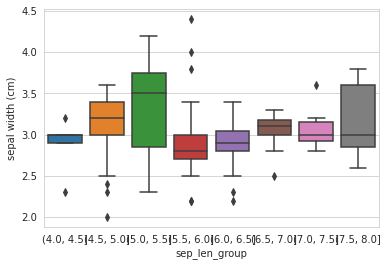

In [282]:
#visualizing sepal width by grouping sepal lengths into 5 bins
import seaborn as sns
sbin=pd.DataFrame(df['sepal width (cm)'])
sbin['sepal length (cm)']= df['sepal length (cm)']
sbin.sort_values(inplace=True,by='sepal length (cm)')
sbin['sep_len_group'] = pd.cut(sbin['sepal length (cm)'], bins=[4,4.5,5,5.5,6,6.5,7,7.5,8])
ax = sns.boxplot(x="sep_len_group", y="sepal width (cm)", data=sbin)


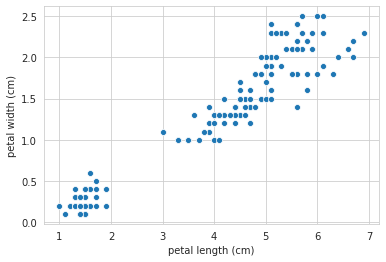

In [283]:
#scatter plot petal length vs width
sns.scatterplot(data=df,x='petal length (cm)',y='petal width (cm)')

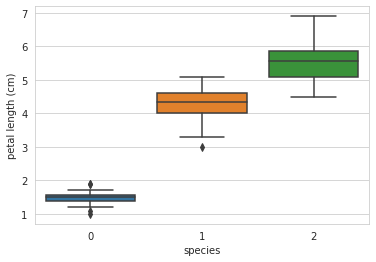

In [284]:
sns.boxplot(x="species",y="petal length (cm)",data=df)
plt.show()

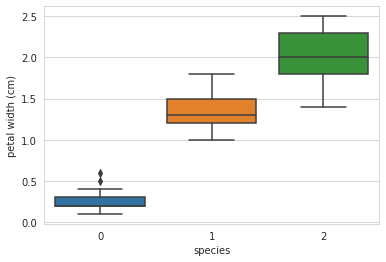

In [285]:
sns.boxplot(x="species",y="petal width (cm)",data=df)
plt.show()

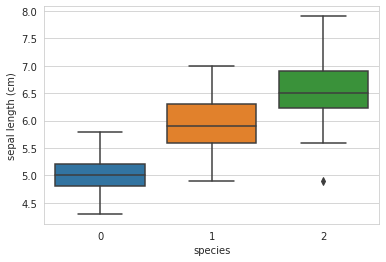

In [286]:
sns.boxplot(x="species",y="sepal length (cm)",data=df)
plt.show()

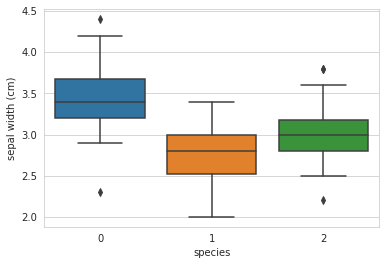

In [287]:
sns.boxplot(x="species",y="sepal width (cm)",data=df)
plt.show()

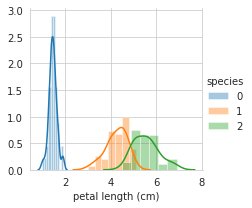

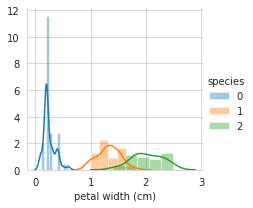

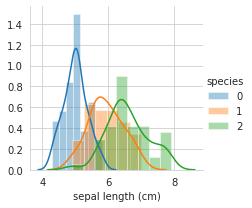

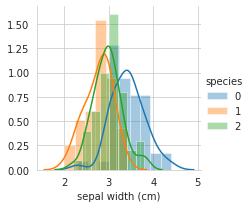

In [288]:
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"petal length (cm)").add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"petal width (cm)").add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"sepal length (cm)").add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"sepal width (cm)").add_legend()
plt.show()

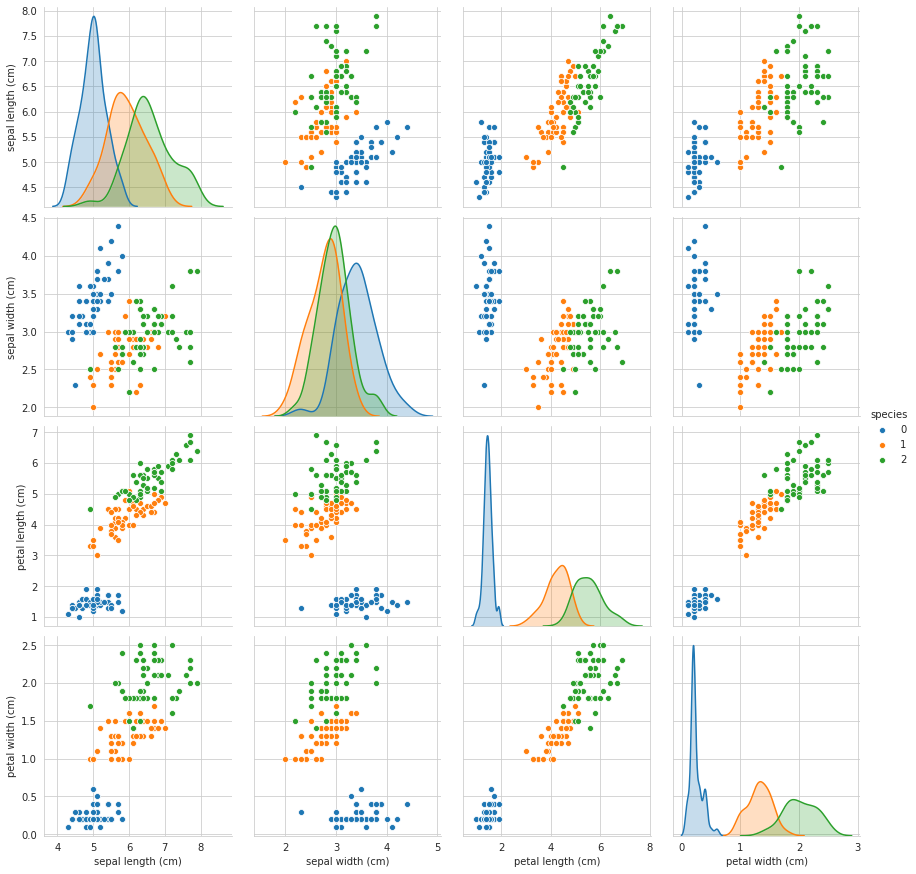

In [289]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=3);
plt.show()

In [0]:
#standardize x1 reduced accuracy but if still needed uncomment
#from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
#x1 = sc_x.fit_transform(x1)


In [0]:

import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x1, y1, test_size = 0.20, random_state = 0)
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

In [0]:
from sklearn.linear_model import LogisticRegression



In [0]:
clf=LogisticRegression(multi_class='ovr',solver='lbfgs',C=10.0,)

In [293]:
#cross val predict makes iterations with different test and train sets each time and in this way finally it has predicts for the whole data as each data point 
#was considered as a test point at some stage
from sklearn.model_selection import cross_val_predict
predicts=cross_val_predict(clf, x1, y1, cv=5)
predicts.size


150

In [294]:
#clf.fit(X_train,Y_train)
#Y_predict=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y1,predicts))
print (sklearn.metrics.classification_report(y1,predicts))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [295]:
#here I am printing accuracy scores for each iteratin of the k fold split. We can also take mean of this accuracy score to get overall accuracy which is generally
# the same as accuracy obtained above
scores = sklearn.model_selection.cross_val_score(clf, x1, y1, cv=5)
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


(39501,)


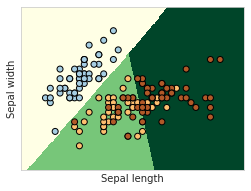

In [296]:

X = iris.data[:, :2]  
Y = iris.target
#reference taken from sikit learn to plot this graph
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap='YlGn')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
#logistic complete
#naive bayes
from sklearn.naive_bayes import GaussianNB


In [0]:
gnb =GaussianNB()

In [320]:
#cross val predict makes iterations with different test and train sets each time and in this way finally it has predicts for the whole data as each data point 
#was considered as a test point at some stage
from sklearn.model_selection import cross_val_predict
predicts=cross_val_predict(gnb, x1, y1, cv=5)
predicts.size

150

In [321]:
#clf.fit(X_train,Y_train)
#Y_predict=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y1,predicts))
print (sklearn.metrics.classification_report(y1,predicts))

[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [322]:
#here I am printing accuracy scores for each iteratin of the k fold split. We can also take mean of this accuracy score to get overall accuracy which is generally
# the same as accuracy obtained above
scores = sklearn.model_selection.cross_val_score(gnb, x1, y1, cv=5)
print(scores)
print(scores.mean())

[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
0.9533333333333334


In [0]:
#gnb finshed
#k means clustering
from sklearn.cluster import KMeans

In [304]:
KMclf = KMeans(n_clusters=3,)
KMclf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [305]:
KMclf.labels_# not that these labels are cluster numbers and not actual labels

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0,
       1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1,
       0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 1, 2, 1, 0], dtype=int32)

In [0]:
#now we figure out the actual cluster labels
def GetActualLabels(cluster_labels,Y_train):
 # Initializing
 reference_labels = {}
 # For loop to run through each label of cluster label
 for i in range(len(np.unique(KMclf.labels_))):
  index = np.where(cluster_labels == i,1,0)
  num = np.bincount(Y_train[index==1]).argmax()
  reference_labels[i] = num
 return reference_labels

In [307]:
reference_labels = GetActualLabels(KMclf.labels_,Y_train)
reference_labels

{0: 0, 1: 2, 2: 1}

In [0]:
number_labels = np.random.rand(len(KMclf.labels_))
for i in range(len(KMclf.labels_)):
  number_labels[i] = reference_labels[KMclf.labels_[i]]

In [309]:
print(number_labels[:20].astype('int'))
print(Y_train[:20])

[2 1 0 1 2 1 0 1 1 1 2 0 2 0 0 1 2 2 1 2]
[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2]


In [310]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,Y_train))

0.8833333333333333


In [0]:
#now we see if no of clusters affect accuracy
#below is a funct to print metrics for the model
def calculate_metrics(model,output):
 print('Number of clusters is {}'.format(model.n_clusters))
 print('Inertia : {}'.format(model.inertia_))
 print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [312]:
from sklearn import metrics
cluster_number = [3,16,32,64,77]#no of clusters<=no of samples
for i in cluster_number:
 total_clusters = 3
 # Initialize the K-Means model
 KMclf = KMeans(n_clusters = i)
 # Fitting the model to training set
 KMclf.fit(X_train)
 # Calculating the metrics
  
 calculate_metrics(KMclf,Y_train)
 # Calculating reference_labels
 reference_labels = GetActualLabels(KMclf.labels_,Y_train)
 # ‘number_labels’ is a list which denotes the number displayed in image
 number_labels = np.random.rand(len(KMclf.labels_))
 for i in range(len(KMclf.labels_)):
  
  number_labels[i] = reference_labels[KMclf.labels_[i]]
 
 print('Accuracy score : {}'.format(accuracy_score(number_labels,Y_train)))
 print('\n')

Number of clusters is 3
Inertia : 63.196666666666665
Homogeneity :       0.7311815209297751
Accuracy score : 0.8833333333333333


Number of clusters is 16
Inertia : 13.505057081807081
Homogeneity :       0.8980093601978169
Accuracy score : 0.95


Number of clusters is 32
Inertia : 6.153595238095238
Homogeneity :       0.9538564169309326
Accuracy score : 0.975


Number of clusters is 64
Inertia : 1.6358333333333337
Homogeneity :       0.9723550663340088
Accuracy score : 0.9833333333333333


Number of clusters is 77
Inertia : 0.9078333333333337
Homogeneity :       0.9999999999999998
Accuracy score : 1.0




In [313]:
#we found highest accuracy for 77 clusters but our no of test samples is only 30 so we can run on max 30  and so run this model on test data with<= 30 clusters
# Testing model on Testing set of size 30
KMclf = KMeans(n_clusters =27)

KMclf.fit(X_test)
calculate_metrics(KMclf,Y_test)
reference_labels = GetActualLabels(KMclf.labels_,Y_test)
number_labels = np.random.rand(len(KMclf.labels_))
for i in range(len(KMclf.labels_)):
 
 number_labels[i] = reference_labels[KMclf.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,Y_test)))
print('\n')

Number of clusters is 27
Inertia : 0.09833333333333329
Homogeneity :       0.9999999999999998
Accuracy score : 1.0




In [314]:
#running on test set with cluster size 3 
KMclf = KMeans(n_clusters =3)

KMclf.fit(X_test)
calculate_metrics(KMclf,Y_test)
reference_labels = GetActualLabels(KMclf.labels_,Y_test)
number_labels = np.random.rand(len(KMclf.labels_))
for i in range(len(KMclf.labels_)):
 
 number_labels[i] = reference_labels[KMclf.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,Y_test)))
print('\n')

Number of clusters is 3
Inertia : 13.892878787878793
Homogeneity :       0.8133923344775366
Accuracy score : 0.9333333333333333




In [324]:
# Testing model on Testing set of size 30 with k fold cross validation
KMclf = KMeans(n_clusters =30)
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(x1) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x1):
  X_train, X_test = x1[train_index], x1[test_index]
  Y_train, Y_test = y1[train_index], y1[test_index]
  KMclf.fit(X_test)
  calculate_metrics(KMclf,Y_test)
  reference_labels = GetActualLabels(KMclf.labels_,Y_test)
  number_labels = np.random.rand(len(KMclf.labels_))
  for i in range(len(KMclf.labels_)):
    number_labels[i] = reference_labels[KMclf.labels_[i]]
 
  print (confusion_matrix(Y_test,number_labels))
  print (sklearn.metrics.classification_report(Y_test,number_labels))

KFold(n_splits=5, random_state=None, shuffle=False)
Number of clusters is 30
Inertia : 0.0
Homogeneity :       1.0
[[30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Number of clusters is 30
Inertia : 0.0
Homogeneity :       1.0000000000000007
[[20  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Number of clusters is 30
Inertia : 0.0
Homogeneity :       1.0
[[30]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

 

In [325]:
# Testing model on Testing set of size 30 with k fold cross validation
KMclf = KMeans(n_clusters =3)
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(x1) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x1):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = x1[train_index], x1[test_index]
  Y_train, Y_test = y1[train_index], y1[test_index]
  KMclf.fit(X_test)
  calculate_metrics(KMclf,Y_test)
  reference_labels = GetActualLabels(KMclf.labels_,Y_test)
  number_labels = np.random.rand(len(KMclf.labels_))
  for i in range(len(KMclf.labels_)):
    number_labels[i] = reference_labels[KMclf.labels_[i]]
 
  print (confusion_matrix(Y_test,number_labels))
  print (sklearn.metrics.classification_report(Y_test,number_labels))

KFold(n_splits=5, random_state=None, shuffle=False)
Number of clusters is 3
Inertia : 2.9441608391608396
Homogeneity :       1.0
[[30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Number of clusters is 3
Inertia : 8.284333333333333
Homogeneity :       1.0000000000000002
[[20  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Number of clusters is 3
Inertia : 5.95275
Homogeneity :       1.0
[[30]]
              precision    recall  f1-score   support

           1       1.00   

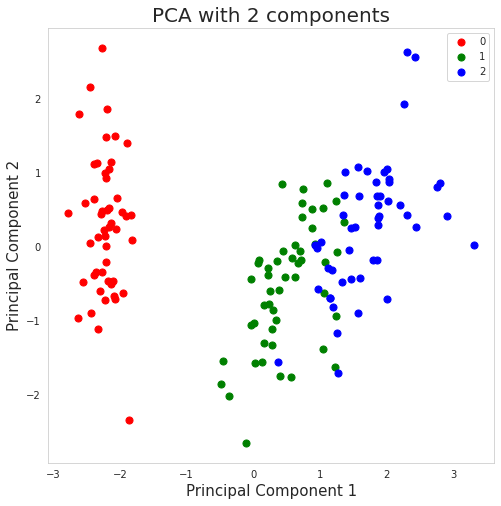

In [330]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(x1)
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA with 2 components', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()